# Problem Statement

#### X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company wants to build a model wherein they need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

# Business Goal


#### Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# The steps are broadly:

#### 1) Importing the required libraries
#### 2) Read and understand the data
#### 3) Clean the data
#### 4) Prepare the data for Model Building
#### 5) Model Building
#### 6) Model Evaluation
#### 7) Making Predictions on the Test Set

# 1) Importing the required libraries

In [526]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [527]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [528]:
# to display all the rowns and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# 2) Loading & Understanding the dataset

In [529]:
# Importing the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [530]:
# Checking the shape of the data
leads.shape

(9240, 37)

In [531]:
# Checking for duplicate values in the dataset
leads.duplicated().sum()

0

In [532]:
# Checking the data types of the columns and total non null counts
leads.info(verbose= True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [533]:
# Checking Statistical aspects of the leads dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [534]:
# Checking all the available features in the leads dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [535]:
# Checking unique values in features

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

# 3) Cleaning the Data

In [536]:
# Checking for the missing values in each features

missing_values = leads.isnull().mean().reset_index()
missing_values[0] = missing_values[0]*100
missing_values = missing_values.rename(columns={"index":"column",0:"%age missing values"})
missing_values = missing_values.sort_values(by="%age missing values", ascending = False)
missing_values

,column,%age missing values
25,Lead Quality,51.590909
30,Asymmetrique Activity Index,45.649351
33,Asymmetrique Profile Score,45.649351
32,Asymmetrique Activity Score,45.649351
31,Asymmetrique Profile Index,45.649351
24,Tags,36.287879
28,Lead Profile,29.318182
15,What matters most to you in choosing a course,29.318182
14,What is your current occupation,29.112554
11,Country,26.634199


In [537]:
# Droping columns where null values is greater than 35%
drop_col = list(missing_values[missing_values["%age missing values"] > 35]["column"])
leads = leads.drop(drop_col, axis = 1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [538]:
leads.shape

(9240, 31)

In [539]:
# verifying that all the columns with missing value greater than 35% are dropped

In [540]:
100*(leads.isnull().mean()).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [541]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [542]:
# Checking all the unique values for every features to check for inconsistencies
for col in leads.columns[2:]:
    print(col.upper(), end=': ')
    print(leads[col].unique())
    print()

LEAD ORIGIN: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

LEAD SOURCE: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

DO NOT EMAIL: ['No' 'Yes']

DO NOT CALL: ['No' 'Yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL TIME SPENT ON WEBSITE: [   0  674 1532 ...  603  483  927]

PAGE VIEWS PER VISIT: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 1

### From the above information we can make the following insights

- Droping all the features containing only one unique values
- Replacing select with NaN values
- Features Prospect ID & lead number contains only unique data which doesn't make any sense.



In [543]:
leads = leads.drop(['Prospect ID', 'Lead Number', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content',
              'I agree to pay the amount through cheque','Magazine'], axis = 1 )

In [544]:
leads.shape

(9240, 24)

In [545]:
# Checking if there are columns with one unique value
leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [546]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leads = leads.replace('Select',np.nan)

In [547]:
# Checking for Null Values
100*(leads.isnull().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.0000

## 3.1)Data imputing with mode values

In [548]:
leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [549]:
# Replacing null values in Country column with mode 'India'
leads['Country'].fillna('India', inplace = True)

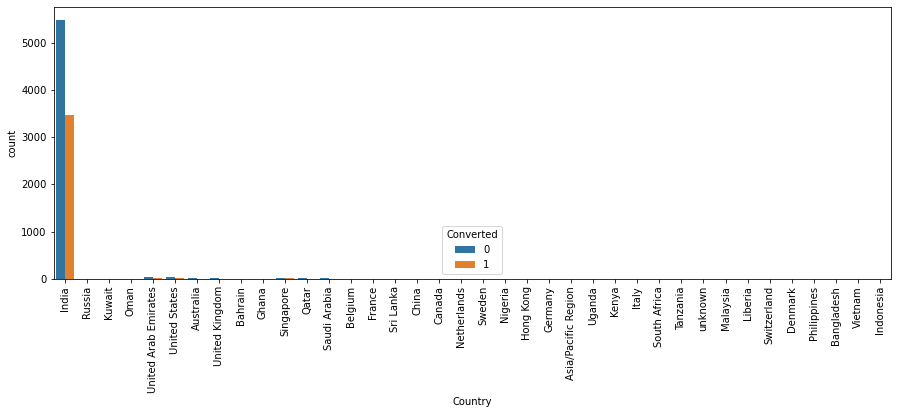

In [550]:
#Plotting for country column
plt.figure(figsize=(15,5))
p1=sns.countplot(leads.Country, hue=leads.Converted)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [551]:
#As we can see the Number of Values for India are quite high

leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

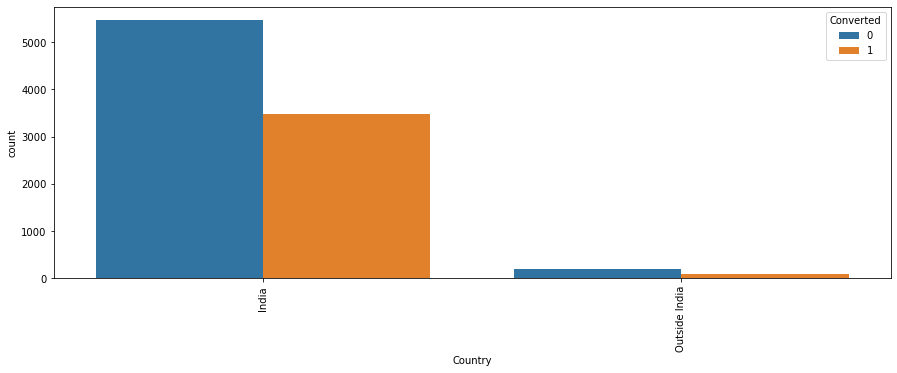

In [552]:
plt.figure(figsize=(15,5))
p1=sns.countplot(leads.Country, hue=leads.Converted)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [553]:
# Since number of values for India is quite high. Therefore, its better to drop this column
leads = leads.drop(['Country'], axis = 1)

In [554]:
# Checking for Specialization
leads['Specialization'].value_counts(dropna=False)


NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [555]:
# Imputing null values in specialization columns with 'Not Specified'
leads['Specialization'].fillna('Not Specified', inplace = True)
leads['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [556]:
# Combining management Specialization
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')  


<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

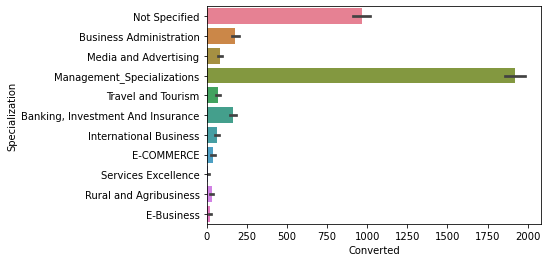

In [557]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [558]:
100*(leads.isnull().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.000000
Search                                            0.0000

In [559]:
# Checking for 'How did you hear about X Education' feature
leads['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [560]:
#As it contains more than 50% of null values therefore its better to drop it
leads = leads.drop(['How did you hear about X Education'], axis = 1)

In [561]:
# Checking for lead profile feature
leads['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [562]:
# It contains more missing values therefore its better to drop it
leads = leads.drop(['Lead Profile'], axis = 1)


In [563]:
# Checking for city column
leads['City'].value_counts(dropna=False)


NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [564]:
# Droping column city since it contains more than 35% of null values
leads = leads.drop(['City'], axis = 1)

In [565]:
# Checking for 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [566]:
# Imputing null values in 'What matters most to you in choosing a course' columns with 'Not Specified'
leads['What matters most to you in choosing a course'].fillna('Not Specified', inplace = True)
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Not Specified                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [567]:
# Checking for 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [568]:
# Imputing null values in 'What is your current occupation' columns with 'Not Specified'
leads['What is your current occupation'].fillna('Not Specified', inplace = True)
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [569]:
# Checking for 'TotalVisits' column
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [570]:
# Droping the null value rows in TotalVisits columns
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [571]:
# Check the null values again
leads.isnull().sum()

Lead Origin                                       0
Lead Source                                      29
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                    0
What is your current occupation                   0
What matters most to you in choosing a course     0
Search                                            0
Newspaper Article                                 0
X Education Forums                                0
Newspaper                                         0
Digital Advertisement                             0
Through Recommendations                           0
A free copy of Mastering The Interview            0
Last Notable

In [572]:
# Checking for 'Lead Source' column
leads['Lead Source'].value_counts(dropna=False)


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [573]:
# Drop the null values rows in the column 'Lead Source'
leads = leads[~pd.isnull(leads['Lead Source'])]

In [574]:
# Check the number of null values again
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
Last Notable Activity          

In [575]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [576]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## 3.2) Exploratory Data Analysis

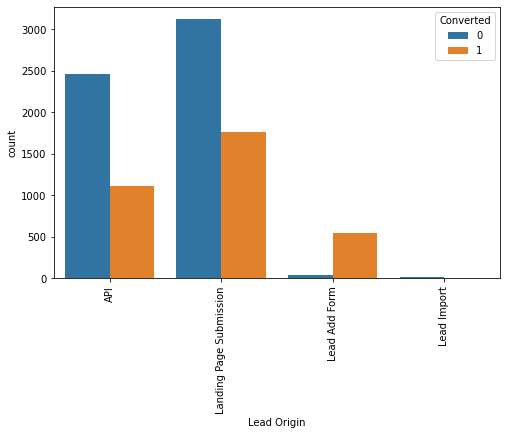

In [577]:
# visualizing Lead Origin column
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Observation

-  From lead Origin Finding, Landing Page Submission bring higher number of leads as well as conversion.
-  Leads originated through 'add forms ' are more likely to convert.


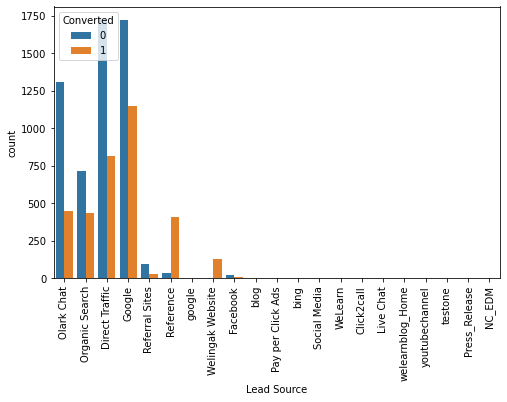

In [578]:
# visualizing Lead Source column
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Observation
- Major lead conversion in the lead source is from 'Google'
- Leads generated from welingak website, Reference are likely to convert.

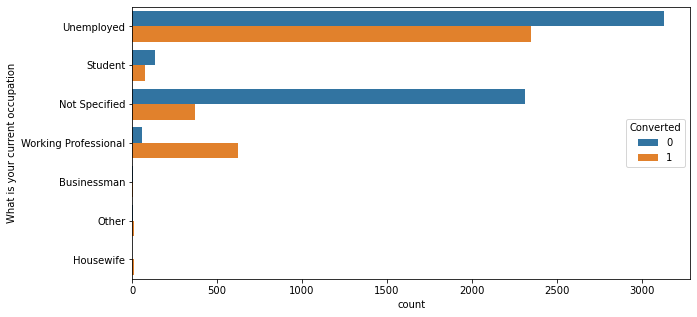

In [579]:
#Understanding Lead Conversion and Current Occupation 
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=leads)
plt.show()

#### Observation
- Major lead conversion is from the Unemployed Group

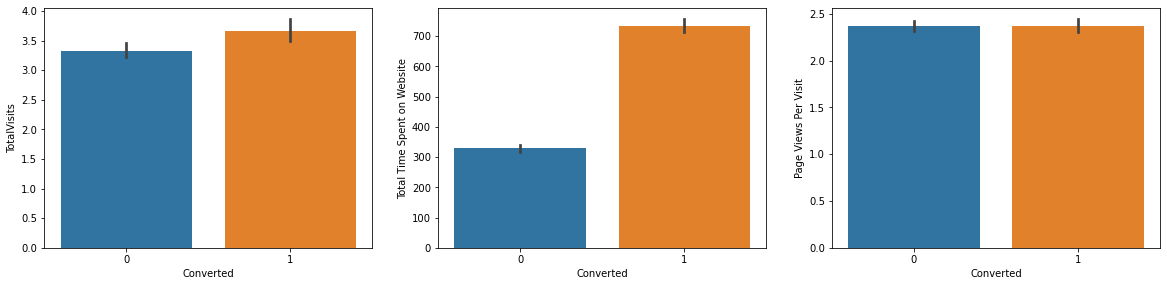

In [580]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = leads)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = leads)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = leads)

plt.show()

#### Observation
- From the above graph, we have mojor lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit



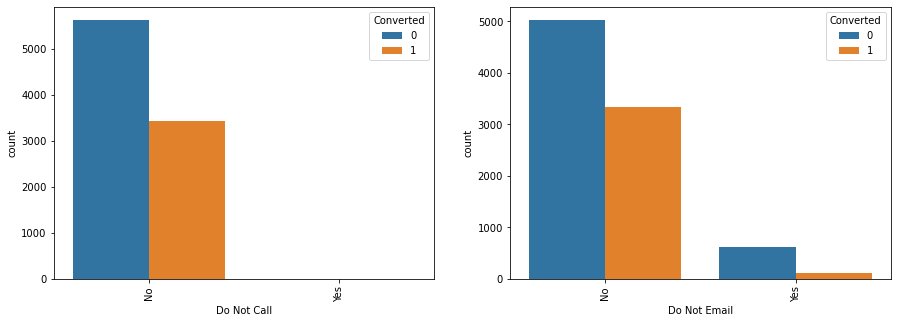

In [581]:
#visualizing count of Do Not Email & Do Not Call based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

#### Observation
- Major conversion has happened from the emails that have been sent

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

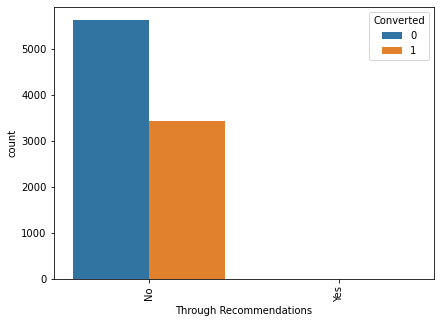

In [582]:
#visualizing count of Through Recommendations  based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Through Recommendations'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)


## 3.3) Outlier Treatment 

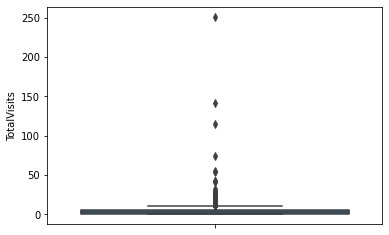

In [583]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()


In [584]:
#checking percentile values for "Total Visits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

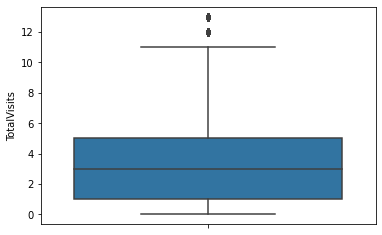

In [585]:
Q3 = leads.TotalVisits.quantile(0.98)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.02)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()


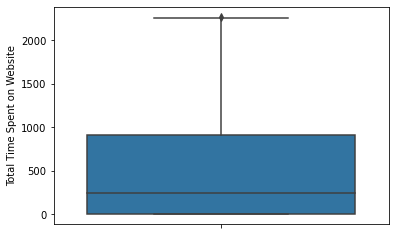

In [586]:
#Total Time Spent on Website

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

- No major outlier present in the above variable

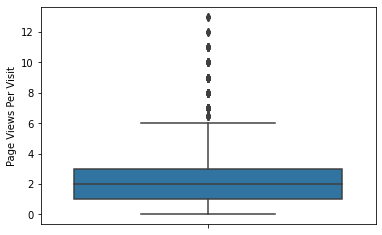

In [587]:
#Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


In [588]:
leads['Page Views Per Visit'].describe()

count    8900.000000
mean        2.310474
std         1.992907
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

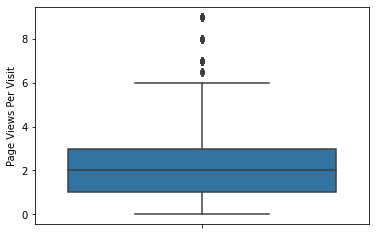

In [589]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


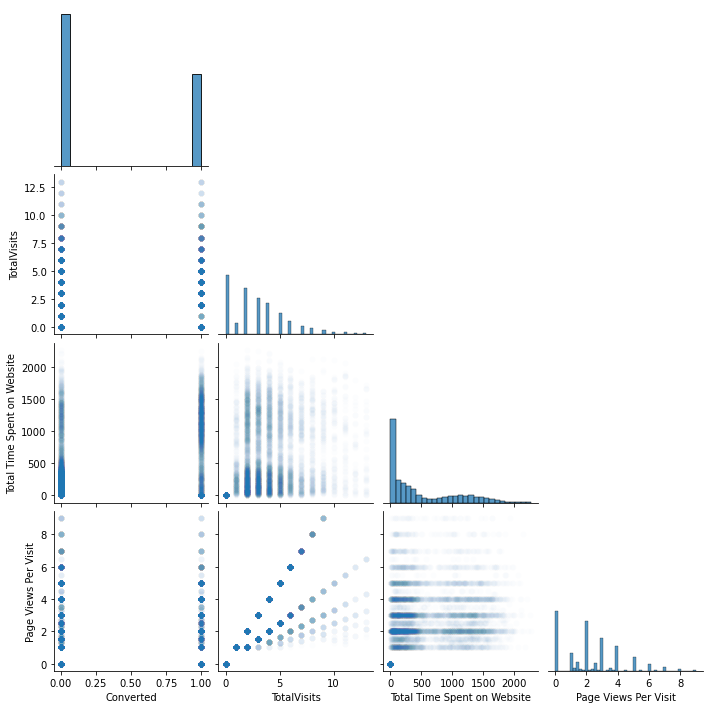

In [590]:
vars=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Setting alpha to 0.01 to see dense clusters
sns.pairplot(leads[vars], plot_kws={'alpha':0.01}, corner=True)
plt.show()

#### Observation

- Total Time Spent on Website : Converted customers are likely to spend between 1000 to 1500 minutes on the website. This means converted customers have an higher average time spend per session on the website. Non-converted customers only spend between 0-500 minutes.

- Page Views Per Visit : Both converted and non-converted customers have the same number of website visits.


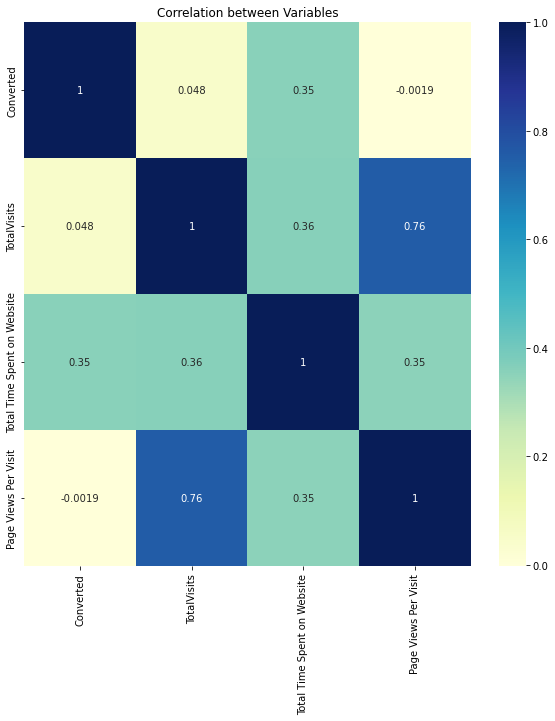

In [591]:
#Checking correlations of numeric values
## heatmap
plt.figure(figsize=(10,10))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation between Variables")
plt.show()


In [592]:
leads.shape

(8849, 20)

In [593]:
leads.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8849.000000,8849.000000,8849.000000,8849.000000
mean,0.376992,3.050062,476.505820,2.261297
std,0.484660,2.688021,543.439559,1.888706
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,239.000000,2.000000
75%,1.000000,4.000000,906.000000,3.000000
90%,1.000000,7.000000,1368.200000,5.000000
99%,1.000000,11.000000,1838.040000,8.000000
max,1.000000,13.000000,2272.000000,9.000000


#### There aren't any major outliers present in the data. So, cheating the dummy variables

# 4) Creating Dummy Variables

In [594]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


#### Converting Binary Variables to 0 and 1 

In [595]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining a map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variables
leads[varlist] = leads[varlist].apply(binary_map)

In [596]:
leads[varlist].head(10)


,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0


In [597]:
# Creating a dummy variable for some of the categorical variables
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([leads, dummy], axis=1)
data.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Specified,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1

In [598]:
# We have created dummies for the below variables, so we can drop them

data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'], 1)

In [599]:
#Rechecking for Null values

data.isnull().sum()/len(data.index)*100

Do Not Email                                                               0.0
Do Not Call                                                                0.0
Converted                                                                  0.0
TotalVisits                                                                0.0
Total Time Spent on Website                                                0.0
Page Views Per Visit                                                       0.0
Search                                                                     0.0
Newspaper Article                                                          0.0
X Education Forums                                                         0.0
Newspaper                                                                  0.0
Digital Advertisement                                                      0.0
Through Recommendations                                                    0.0
A free copy of Mastering The Interview              

In [600]:
# Removing rows where TotalVisits and Page Views Per Visit have null values, this wont have any impact

data = data[~np.isnan(data['TotalVisits'])]
data = data[~np.isnan(data['Page Views Per Visit'])]

In [601]:
data.isnull().sum()/len(data.index)*100

Do Not Email                                                               0.0
Do Not Call                                                                0.0
Converted                                                                  0.0
TotalVisits                                                                0.0
Total Time Spent on Website                                                0.0
Page Views Per Visit                                                       0.0
Search                                                                     0.0
Newspaper Article                                                          0.0
X Education Forums                                                         0.0
Newspaper                                                                  0.0
Digital Advertisement                                                      0.0
Through Recommendations                                                    0.0
A free copy of Mastering The Interview              

# 5) Splitting the dataset into train and test datasets

In [602]:
X = data.drop(['Converted'], axis=1)

X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Specified,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [603]:
# Putting response variable to y
y = data['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [604]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5.1) Feature Scaling

In [605]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Specified,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1211,0,0,-0.008066,-0.671721,0.398373,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4664,0,0,-1.135013,-0.869689,-1.193982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3614,0,0,1.118881,-0.336841,0.398373,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2191,0,0,0.367583,-0.795683,-0.132412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
433,0,0,-0.383715,-0.133323,-0.132412,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [606]:
# Checking the conversion rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.699175048028025

- As we can see that the conversion rate for the company X is around 38 %

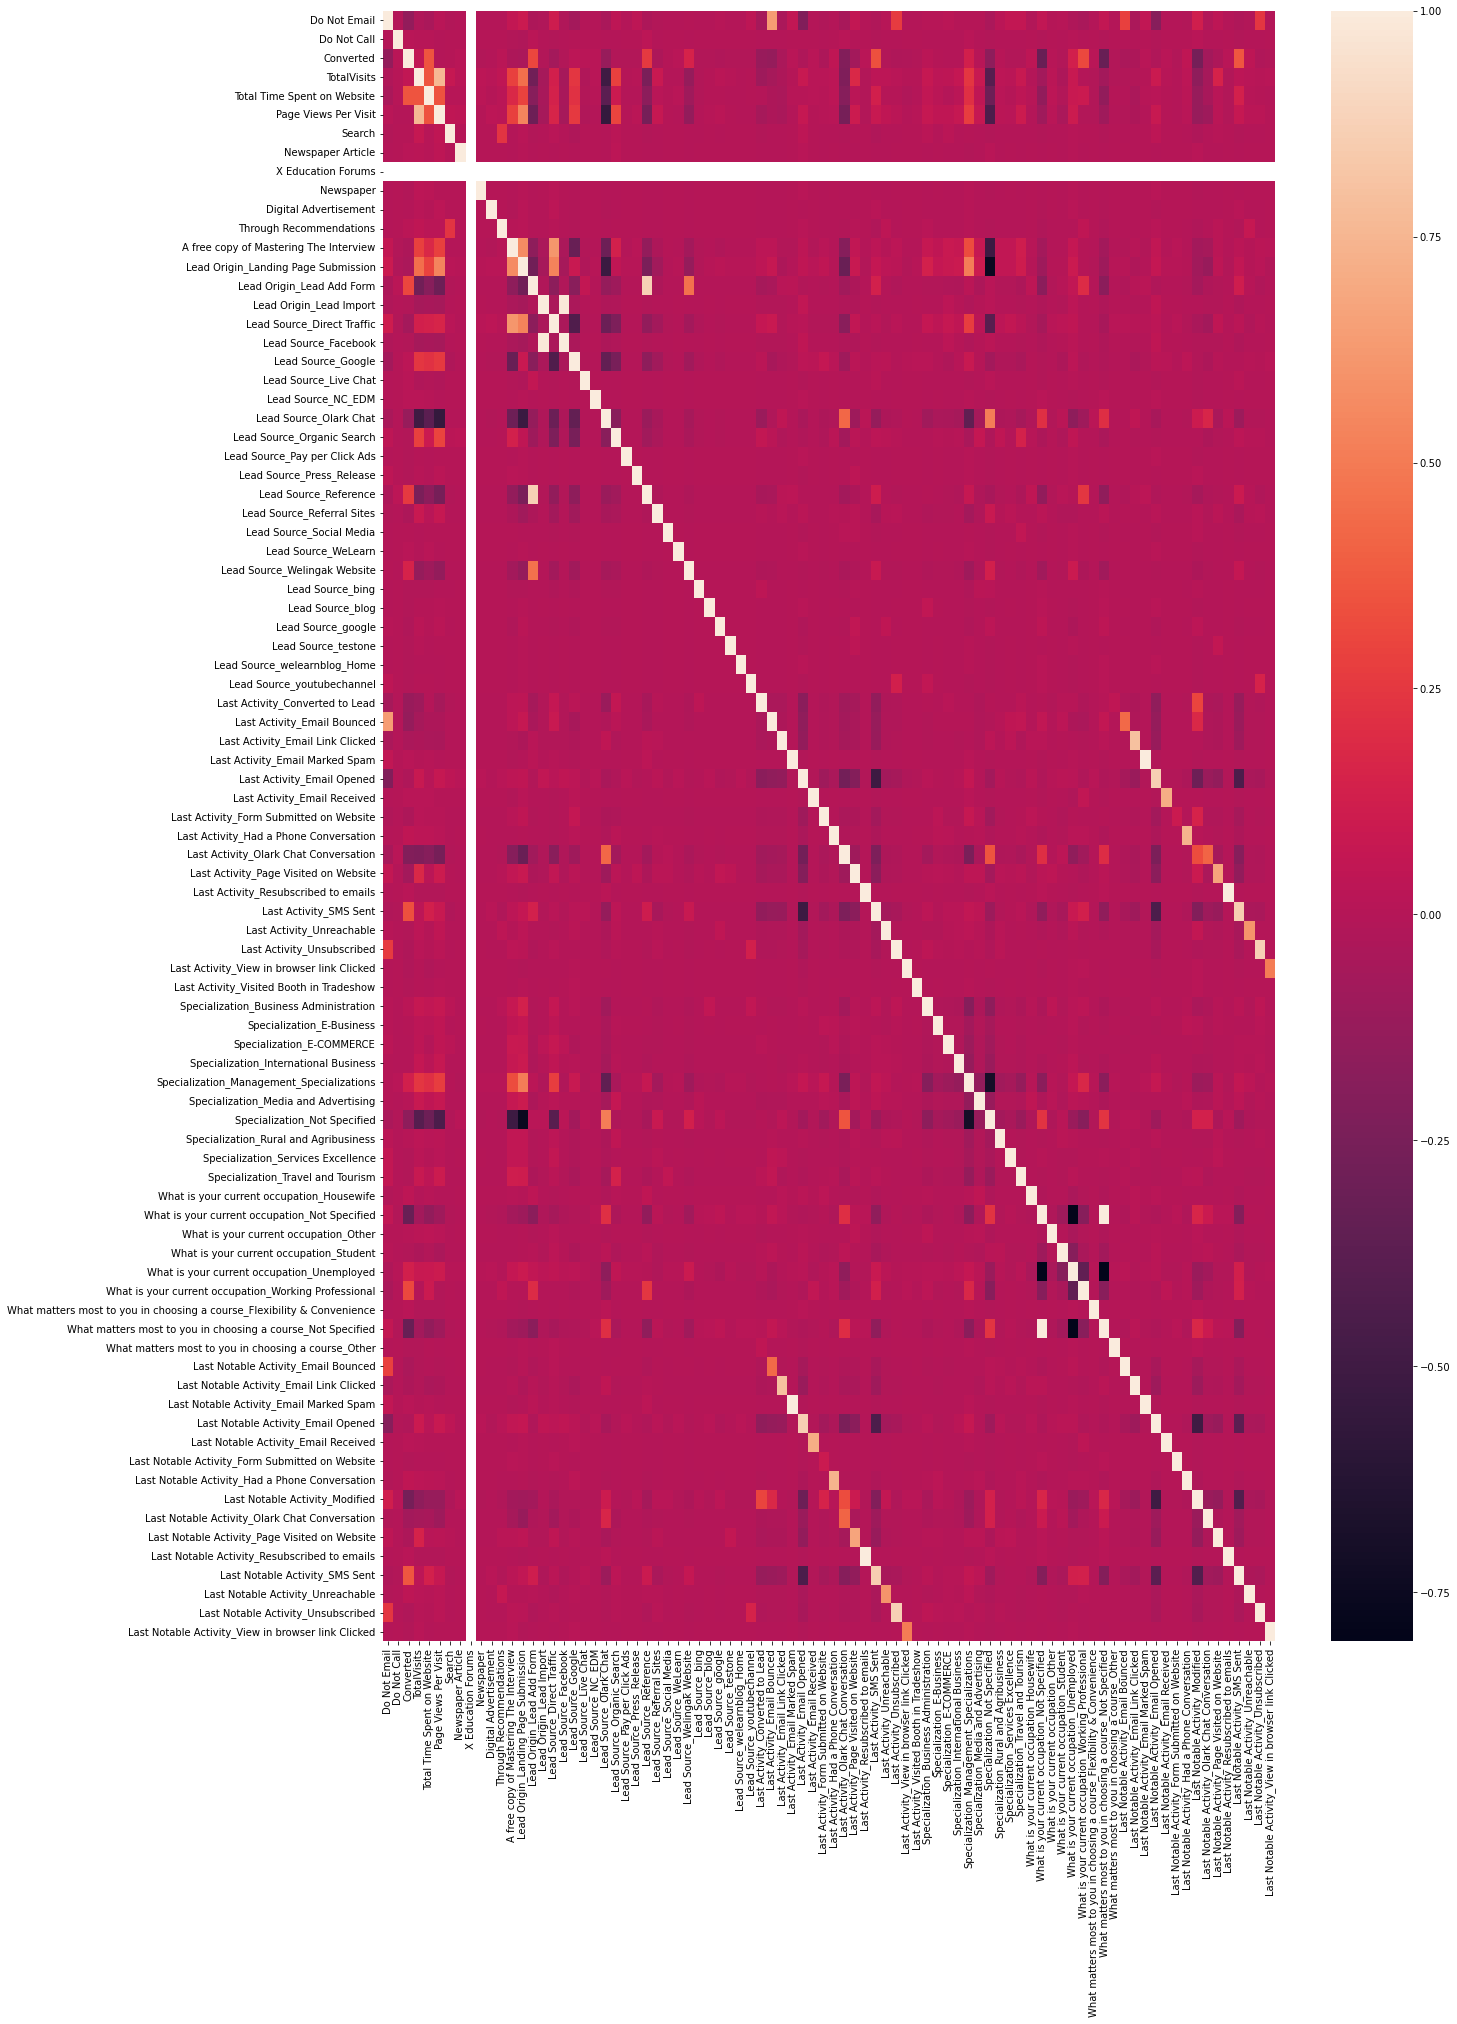

In [607]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(data.corr())
plt.show()

- We will drop the variables after RFE

# 6) Model Building

In [608]:
# Logistic regression model

import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6118
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2392.4
Date:                Fri, 30 Dec 2022   Deviance:                       4784.7
Time:                        20:18:05   Pearson chi2:                 6.15e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      25.4368   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                                               -1.2109      0.217     -5.580      0.000      -1.636      -0.786
Do Not Call                                                                21.3764   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                                                 0.3281      0.057      5.723      0.000       0.216       0.441
Total Time Spent on Website                                                 1.0682      0.042     25.334      0.000       0.986       1.151
Page Views Per Visit                                                       -0.3076      0.061     -5.005      0.000      -0.428      -0.187
Search                                                                     -0.2233      0.833     -0.268      0.789      -1.856       1.410
Newspaper Article                                                          24.8743   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                                      -4.492e-09   2.82e-05     -0.000      1.000   -5.54e-05    5.54e-05
Newspaper                                                                3.611e-09   2.92e-05      0.000      1.000   -5.73e-05    5.73e-05
Digital Advertisement                                                      -0.3608      1.301     -0.277      0.782      -2.911       2.189
Through Recommendations                                                     0.5679      1.764      0.322      0.748      -2.890       4.026
A free copy of Mastering The Interview                                     -0.1486      0.117     -1.267      0.205      -0.378       0.081
Lead Origin_Landing Page Submission                                        -0.7513      0.146     -5.129      0.000      -1.038      -0.464
Lead Origin_Lead Add Form                                                  -0.8257      1.537     -0.537      0.591      -3.837       2.186
Lead Origin_Lead Import                                                    -1.0938      1.041     -1.051      0.293      -3.133       0.946
Lead Source_Direct Traffic                                                 -2.5999      2.004     -1.297      0.195      -6.528       1.328
Lead Source_Facebook                                                       -1.0938      1.041     -1.051      0.293      -3.133       0.946
Lead Source_Google                                                         -2.3717      2.002     -1.184      0.236      -6.296       1.553
Lea

## Feature Selection Using RFE

In [609]:

# importing libraries for RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [610]:
# Creating a RFE object

logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_


array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False])

In [611]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns, rfe.support_, rfe.ranking_)).sort()

In [612]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 56),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Search', False, 54),
 ('Newspaper Article', False, 8),
 ('X Education Forums', False, 67),
 ('Newspaper', False, 69),
 ('Digital Advertisement', False, 44),
 ('Through Recommendations', False, 48),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 70),
 ('Lead Source_Press_Release', False, 68),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16

In [613]:
# Storing variables with significant weights in a variable

col = X_train.columns[rfe.support_]

In [614]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       '

In [615]:
# Model 2 : Using features selected by RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6178
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2479.6
Date:                Fri, 30 Dec 2022   Deviance:                       4959.2
Time:                        20:18:20   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.1237      0.057    -19.782      0.000      -1.235      -1.012
Do Not Email                                                   -1.4156      0.168     -8.405      0.000      -1.746      -1.086
Total Time Spent on Website                                     1.0972      0.041     26.707      0.000       1.017       1.178
Lead Origin_Lead Add Form                                       1.8259      0.923      1.977      0.048       0.016       3.636
Lead Source_Olark Chat                                          1.3700      0.107     12.858      0.000       1.161       1.579
Lead Source_Reference                                           2.0114      0.953      2.110      0.035       0.143       3.879
Lead Source_Welingak Website                                    4.3975      1.369      3.213      0.001       1.715       7.080
Last Activity_Converted to Lead                                -1.1463      0.205     -5.592      0.000      -1.548      -0.745
Last Activity_Had a Phone Conversation                          0.8223      0.843      0.975      0.329      -0.830       2.475
Last Activity_Olark Chat Conversation                          -1.2782      0.161     -7.934      0.000      -1.594      -0.962
What is your current occupation_Housewife                      22.0204   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
What is your current occupation_Working Professional            2.5470      0.193     13.192      0.000       2.169       2.925
What matters most to you in choosing a course_Not Specified    -1.1806      0.089    -13.225      0.000      -1.356      -1.006
Last Notable Activity_Had a Phone Conversation                  2.6910      1.400      1.922      0.055      -0.053       5.435
Last Notable Activity_SMS Sent                                  1.4844      0.082     18.091      0.000       1.324       1.645
Last Notable Activity_Unreachable                               1.7088      0.564      3.029      0.002       0.603       2.815
===============================================================================================================================
"""

In [616]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_sm2=X_train_sm.drop(['const','What is your current occupation_Housewife'],1)



In [617]:
X_train_sm3 = sm.add_constant(X_train_sm2)
logm2 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6179
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2482.7
Date:                Fri, 30 Dec 2022   Deviance:                       4965.5
Time:                        20:18:20   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.1189      0.057    -19.725      0.000      -1.230      -1.008
Do Not Email                                                   -1.4190      0.168     -8.423      0.000      -1.749      -1.089
Total Time Spent on Website                                     1.0987      0.041     26.751      0.000       1.018       1.179
Lead Origin_Lead Add Form                                       1.8233      0.923      1.975      0.048       0.014       3.633
Lead Source_Olark Chat                                          1.3690      0.107     12.853      0.000       1.160       1.578
Lead Source_Reference                                           2.0357      0.953      2.136      0.033       0.168       3.903
Lead Source_Welingak Website                                    4.3984      1.369      3.213      0.001       1.716       7.081
Last Activity_Converted to Lead                                -1.1513      0.205     -5.616      0.000      -1.553      -0.749
Last Activity_Had a Phone Conversation                          0.8172      0.843      0.969      0.333      -0.836       2.470
Last Activity_Olark Chat Conversation                          -1.2810      0.161     -7.950      0.000      -1.597      -0.965
What is your current occupation_Working Professional            2.5431      0.193     13.169      0.000       2.165       2.922
What matters most to you in choosing a course_Not Specified    -1.1839      0.089    -13.264      0.000      -1.359      -1.009
Last Notable Activity_Had a Phone Conversation                  2.6928      1.400      1.923      0.054      -0.052       5.437
Last Notable Activity_SMS Sent                                  1.4803      0.082     18.043      0.000       1.319       1.641
Last Notable Activity_Unreachable                               1.7063      0.564      3.023      0.003       0.600       2.813
===============================================================================================================================
"""

- The p-values of all variables in model 5 are in check, let's check for their VIF's.

In [618]:
# Make a VIF dataframe for all the variables present
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,52.96
5,Lead Source_Reference,41.51
6,Lead Source_Welingak Website,13.82
0,const,2.79
8,Last Activity_Had a Phone Conversation,2.22
12,Last Notable Activity_Had a Phone Conversation,2.22
4,Lead Source_Olark Chat,1.47
2,Total Time Spent on Website,1.31
9,Last Activity_Olark Chat Conversation,1.28
11,What matters most to you in choosing a course_...,1.15


In [619]:
# Making Predictions on train data
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm3)
y_train_pred[:10]

1211    0.045616
4664    0.330612
3614    0.497824
2191    0.348847
433     0.220054
6458    0.942266
3437    0.501382
7171    0.976234
8765    0.089546
3992    0.054695
dtype: float64

In [620]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04561564, 0.33061167, 0.4978243 , 0.34884743, 0.22005436,
       0.9422662 , 0.50138162, 0.97623356, 0.08954649, 0.05469496])

In [621]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.045616
1,0,0.330612
2,1,0.497824
3,1,0.348847
4,0,0.220054


In [622]:
# Selecting a threhold of 0.5 to make predictions
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.045616,0
1,0,0.330612,0
2,1,0.497824,0
3,1,0.348847,0
4,0,0.220054,0


In [623]:
# Checking metrics using a confusion Matrix, Sensitivity and Specificity

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3458  418]
 [ 728 1590]]


In [624]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8149822408782693


In [625]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [626]:
# Printing the confusion matrix

print("True Positives :",TP)
print("True Negatives :",TN)
print("False Positives :",FP)
print("False Negatives :",FN)

True Positives : 1590
True Negatives : 3458
False Positives : 418
False Negatives : 728


In [627]:
# sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.6859361518550474


In [628]:
# calculate specificity
print( TN / float(TN+FP))


0.8921568627450981


In [629]:
# false postive rate - predicting converted when not converted
print(FP/ float(TN+FP))

0.10784313725490197


In [630]:
# positive predictive value 

print (TP / float(TP+FP))


0.7918326693227091


In [631]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8260869565217391


# 7) Plotting a ROC curve to check AOC


In [632]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

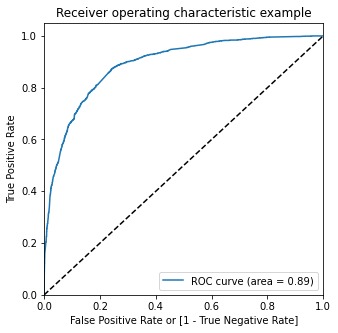

In [633]:
# Plotting the ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- ROC is close to 0.9 which is excellent 

In [634]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.045616,0,1,0,0,0,0,0,0,0,0,0
1,0,0.330612,0,1,1,1,1,0,0,0,0,0,0
2,1,0.497824,0,1,1,1,1,1,0,0,0,0,0
3,1,0.348847,0,1,1,1,1,0,0,0,0,0,0
4,0,0.220054,0,1,1,1,0,0,0,0,0,0,0


In [635]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374233  1.000000  0.000000
0.1   0.1  0.606070  0.978861  0.383127
0.2   0.2  0.768163  0.904228  0.686791
0.3   0.3  0.800613  0.863676  0.762900
0.4   0.4  0.814821  0.763589  0.845459
0.5   0.5  0.814982  0.685936  0.892157
0.6   0.6  0.809332  0.622088  0.921311
0.7   0.7  0.785276  0.505608  0.952528
0.8   0.8  0.767678  0.426661  0.971620
0.9   0.9  0.721343  0.276100  0.987616


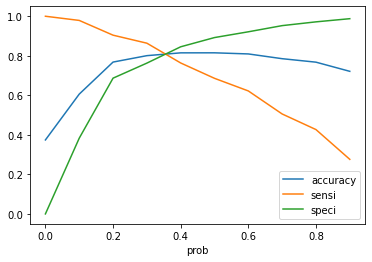

In [636]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Above curve shows that cutoff probability is 0.2

In [637]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.045616,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.330612,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.497824,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.348847,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.220054,0,1,1,1,0,0,0,0,0,0,0,1


In [638]:
# checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7681627381336777

In [639]:
#confusion matrix with the new threshold

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

print("True Positives :",TP)
print("True Negatives :",TN)
print("False Positives :",FP)
print("False Negatives :",FN)


True Positives : 2096
True Negatives : 2662
False Positives : 1214
False Negatives : 222


In [640]:
# sensitivity of our logistic regression model
print("sensitivity:", (TP / float(TP+FN)))

# specificity
print("specificity:", TN / float(TN+FP))

#false postive rate
print("false postive rate:", FP/ float(TN+FP))

# Positive predictive value 

print ("Positive predictive value:",TP / float(TP+FP))

# Negative predictive value

print ("Negative predictive value:",TN / float(TN+ FN))


sensitivity: 0.9042277825711821
specificity: 0.6867905056759546
false postive rate: 0.31320949432404543
Positive predictive value: 0.6332326283987916
Negative predictive value: 0.9230235783633842


# 8) Checking Precision and Recall

In [641]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("confusion:",confusion)

# Calculating Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

confusion: [[3458  418]
 [ 728 1590]]


0.7918326693227091

In [642]:
# Calculating Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.6859361518550474

In [643]:
from sklearn.metrics import precision_score, recall_score


In [644]:
# Precision score on train data
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7918326693227091

In [645]:
# Checking Recall Score on train data
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6859361518550474

- Precision is around 80% and recall rate is 69% 

In [646]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

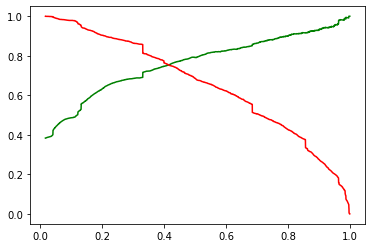

In [647]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


# 9) Making predictions on the test set

In [648]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [649]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Specified,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2750,0,0,-1.135013,-0.869689,-1.193982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2176,0,0,-0.008066,2.595673,-0.397804,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5852,0,0,-1.135013,-0.869689,-1.193982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
522,0,0,2.997126,-0.682822,1.725336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3842,0,0,-1.135013,-0.869689,-1.193982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [650]:
X_test = X_test[col] 
X_test=X_test.drop(['Total Time Spent on Website'],1)
X_test.head()


,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not Specified,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2750,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2176,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5852,0,0,1,0,0,0,0,1,0,0,0,0,0,0
522,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3842,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [651]:
X_test_sm = sm.add_constant(X_test)

In [652]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2750    0.669170
2176    0.246221
5852    0.820774
522     0.246221
3842    0.669170
943     0.806000
188     0.246221
9001    0.246221
3930    0.246221
4797    0.305223
dtype: float64

In [653]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [654]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [655]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [656]:
y_pred_final.head()


,Converted,0
0,0,0.669170
1,0,0.246221
2,0,0.820774
3,0,0.246221
4,0,0.669170


In [657]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()



,Converted,Converted_Prob
0,0,0.669170
1,0,0.246221
2,0,0.820774
3,0,0.246221
4,0,0.669170


In [658]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()



,Converted,Converted_Prob,final_predicted
0,0,0.669170,1
1,0,0.246221,1
2,0,0.820774,1
3,0,0.246221,1
4,0,0.669170,1



# 10) Model Evaluation 

- overall accuracy

In [659]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.5340866290018832

In [660]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[ 457, 1180],
       [  57,  961]], dtype=int64)

In [661]:
TP = confusion2[1,1]
print("True Positives :",TP)

TN = confusion2[0,0]
print("True Negatives :",TN)


FP = confusion2[0,1]
print("False Positives :",FP)

FN = confusion2[1,0]
print("False Negatives :",FN)

True Positives : 961
True Negatives : 457
False Positives : 1180
False Negatives : 57


In [662]:
print("sensitivity:", TP / float(TP+FN)*100)
print("specificity:",TN / float(TN+FP)*100)
print("precision score on test data:", precision_score(y_pred_final.Converted, y_pred_final.final_predicted)*100)
print("recall score:", recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

sensitivity: 94.4007858546169
specificity: 27.916921197312156
precision score on test data: 44.88556749182625
recall score: 0.944007858546169


In [663]:
#Checking precision score on test data

precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.4488556749182625

In [664]:
#Checking recall score on test data

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.944007858546169

# CONCLUSION


>The lead and customer funnel is the right approach to check the outcome. 

>As we can see, there were a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. 

>In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion. 

>For the instance of checking the conversion rate, firstly sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted. 

>Secondly, we must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads.

>A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects. Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. 

>Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses.
